<center><h1>Time Series Analysis</h1></center>
<center><h3>Resolución Laboratorio 1</h3></center>
<h5>Juan Tarletta</h5>
</br>

In [1]:
# Paquetes
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
data=pd.read_csv('datasets/Telefonia_movil.csv')#, index_col='Date', parse_dates=True, dayfirst=True)
#data.index=data.index.to_period(freq='Q') # converting the index to quarterly period instead of dates
#data=data['01-1980':] # filtering the use data from Jan/1980 onwards
data.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
20,2018,1,13.423.580,5850985,19274565,Ene-Mar 2018
21,2018,2,14.240.217,6027374,20267591,Abr-Jun 2018
22,2018,3,14.574.305,6108477,20682782,Jul-Sept 2018
23,2018,4,14.915.060,6613685,21528745,Oct-Dic 2018
24,2019,1,13.937.271,6427084,20364355,Ene-Mar 2019


In [5]:
data.shape

(25, 6)

In [6]:
#Unimos las columnas de Año y Trimestre
indice = data[['Año', 'Trimestre']].apply(lambda x: 'Q'.join(str(value) for value in x), axis=1) 

#Establecemos como indice los correspondientes trimestres
data.index = indice 
data.tail(15)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2015Q3,2015,3,11.766.711,7198826,18965537,Jul-Sept 2015
2015Q4,2015,4,11.905.073,7301039,19206111,Oct-Dic 2015
2016Q1,2016,1,11.230.991,6656647,17887638,Ene-Mar 2016
2016Q2,2016,2,11.493.027,6778732,18271759,Abr-Jun 2016
2016Q3,2016,3,11.923.391,7077838,19001229,Jul-Sept 2016
2016Q4,2016,4,15.960.765,6938892,22899656,Oct-Dic 2016
2017Q1,2017,1,14.630.269,6209983,20840252,Ene-Mar 2017
2017Q2,2017,2,15.315.167,6293563,21608730,Abr-Jun 2017
2017Q3,2017,3,15.106.275,6308373,21414647,Jul-Sept 2017
2017Q4,2017,4,14.164.552,5380710,19545262,Oct-Dic 2017


### Análisis Exploratorio

In [7]:
data.iloc[:,:len(data.columns)-1]

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
2013Q1,2013,1,8.785.943,6582117,15368060
2013Q2,2013,2,9.512.689,7108640,16621329
2013Q3,2013,3,10.315.484,7335154,17650638
2013Q4,2013,4,9.809.515,6250549,16060064
2014Q1,2014,1,10.128.751,5799223,15927974
2014Q2,2014,2,10.821.463,6438071,17259534
2014Q3,2014,3,11.524.344,7179152,18703495
2014Q4,2014,4,11.997.330,7147630,19144961
2015Q1,2015,1,10.273.637,6480172,16753809
2015Q2,2015,2,11.226.576,6579819,17806395


In [8]:
#Importante, convertimos los valores de nuestro dataframe de str a float para poder manipularlos (graficarlos, entrenarlos, etc)
datos = (data.iloc[:,:len(data.columns)-1].replace('\.','', regex=True)
            .replace(',','.', regex=True)
            .astype(float))

In [9]:
#Separamos las columnas a analizar en Series individuales
data_pospago = datos[['Minutos pospago salientes (miles)']]
data_prepago = datos[['Minutos prepago salientes (miles)']]
data_total = datos[['Total de minutos salientes (miles)']]

display(data_pospago,data_prepago,data_total)

,Minutos pospago salientes (miles)
2013Q1,8785943.0
2013Q2,9512689.0
2013Q3,10315484.0
2013Q4,9809515.0
2014Q1,10128751.0
2014Q2,10821463.0
2014Q3,11524344.0
2014Q4,11997330.0
2015Q1,10273637.0
2015Q2,11226576.0


,Minutos prepago salientes (miles)
2013Q1,6582117.0
2013Q2,7108640.0
2013Q3,7335154.0
2013Q4,6250549.0
2014Q1,5799223.0
2014Q2,6438071.0
2014Q3,7179152.0
2014Q4,7147630.0
2015Q1,6480172.0
2015Q2,6579819.0


,Total de minutos salientes (miles)
2013Q1,15368060.0
2013Q2,16621329.0
2013Q3,17650638.0
2013Q4,16060064.0
2014Q1,15927974.0
2014Q2,17259534.0
2014Q3,18703495.0
2014Q4,19144961.0
2015Q1,16753809.0
2015Q2,17806395.0


In [10]:
#Obtenemos algunas estadisticas de nuestro dataset
datos.iloc[:,[0,2,3,4]].describe().round(2)

,Año,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,25.00,25.00,25.0,25.00
mean,2015.64,12359295.44,6562909.4,18922204.72
std,1.85,2085582.33,516860.4,1982378.31
min,2013.00,8785943.00,5380710.0,15368060.00
25%,2014.00,10821463.00,6250549.0,17650638.00
50%,2016.00,11905073.00,6579819.0,19001229.00
75%,2017.00,14240217.00,7077838.0,20364355.00
max,2019.00,15960765.00,7335154.0,22899656.00


In [11]:
y = data_pospago['Minutos pospago salientes (miles)']
type(y)

pandas.core.series.Series

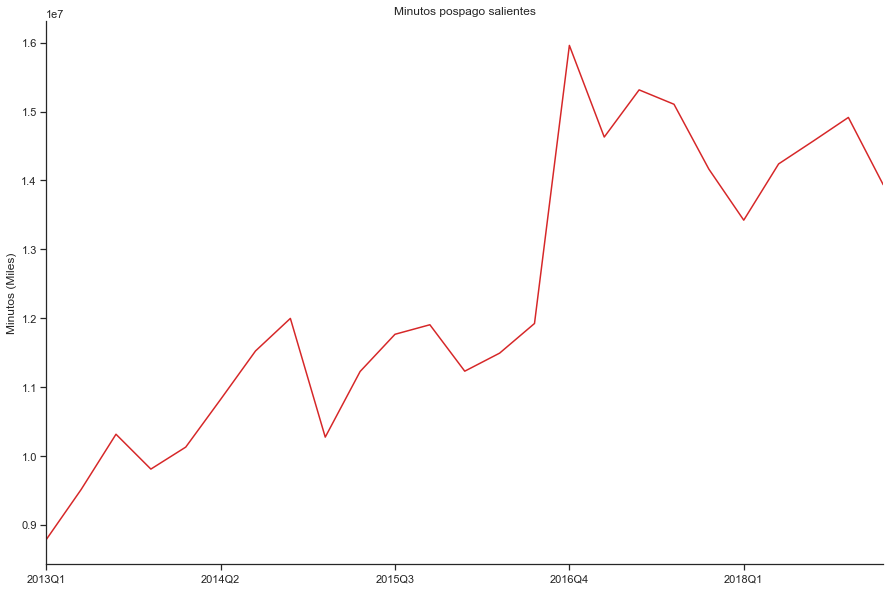

In [12]:
#Graficamos solo una columna
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Minutos (Miles)')
ax.set_title('Minutos pospago salientes')
#ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
plt.show()

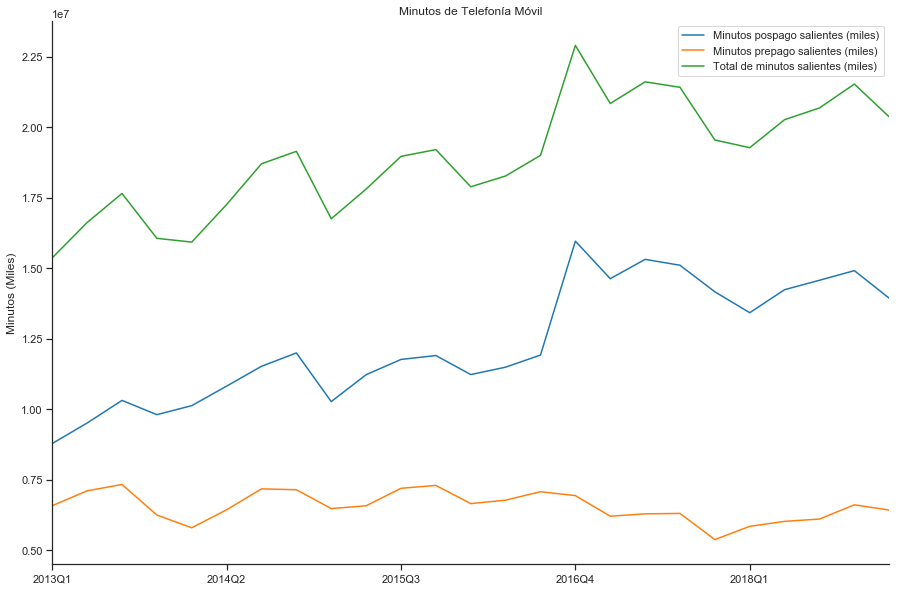

In [13]:
#Graficamos las 3 columnas
ax = datos.iloc[:,2:].plot( title='Minutos de Telefonía Móvil')
ax.set_ylabel('Minutos (Miles)')
sns.despine()
plt.show()

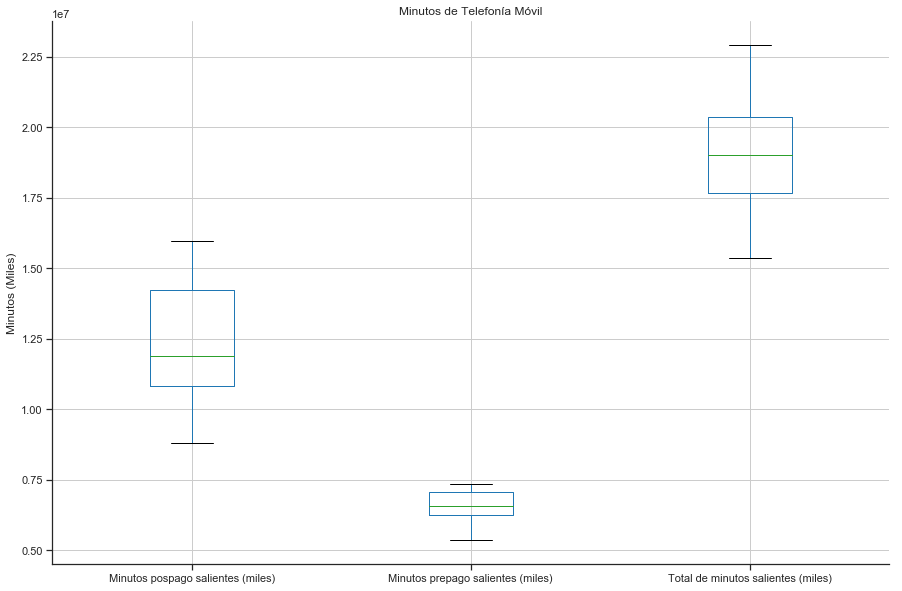

In [14]:
#Hacemos el diagrama de caja de las 3 columnas
ax = datos.iloc[:,2:].boxplot()
ax.set_title('Minutos de Telefonía Móvil')
ax.set_ylabel('Minutos (Miles)')
sns.despine()
plt.show()

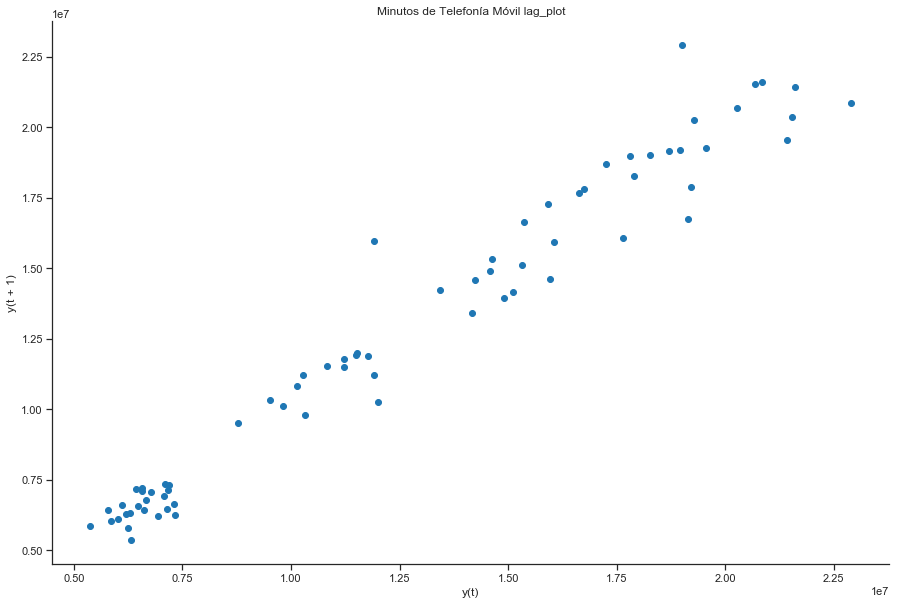

In [15]:
from pandas.plotting import lag_plot
ax = lag_plot(datos.iloc[:,2:], lag=1)
ax.set_title('Minutos de Telefonía Móvil lag_plot')
sns.despine()
plt.show()

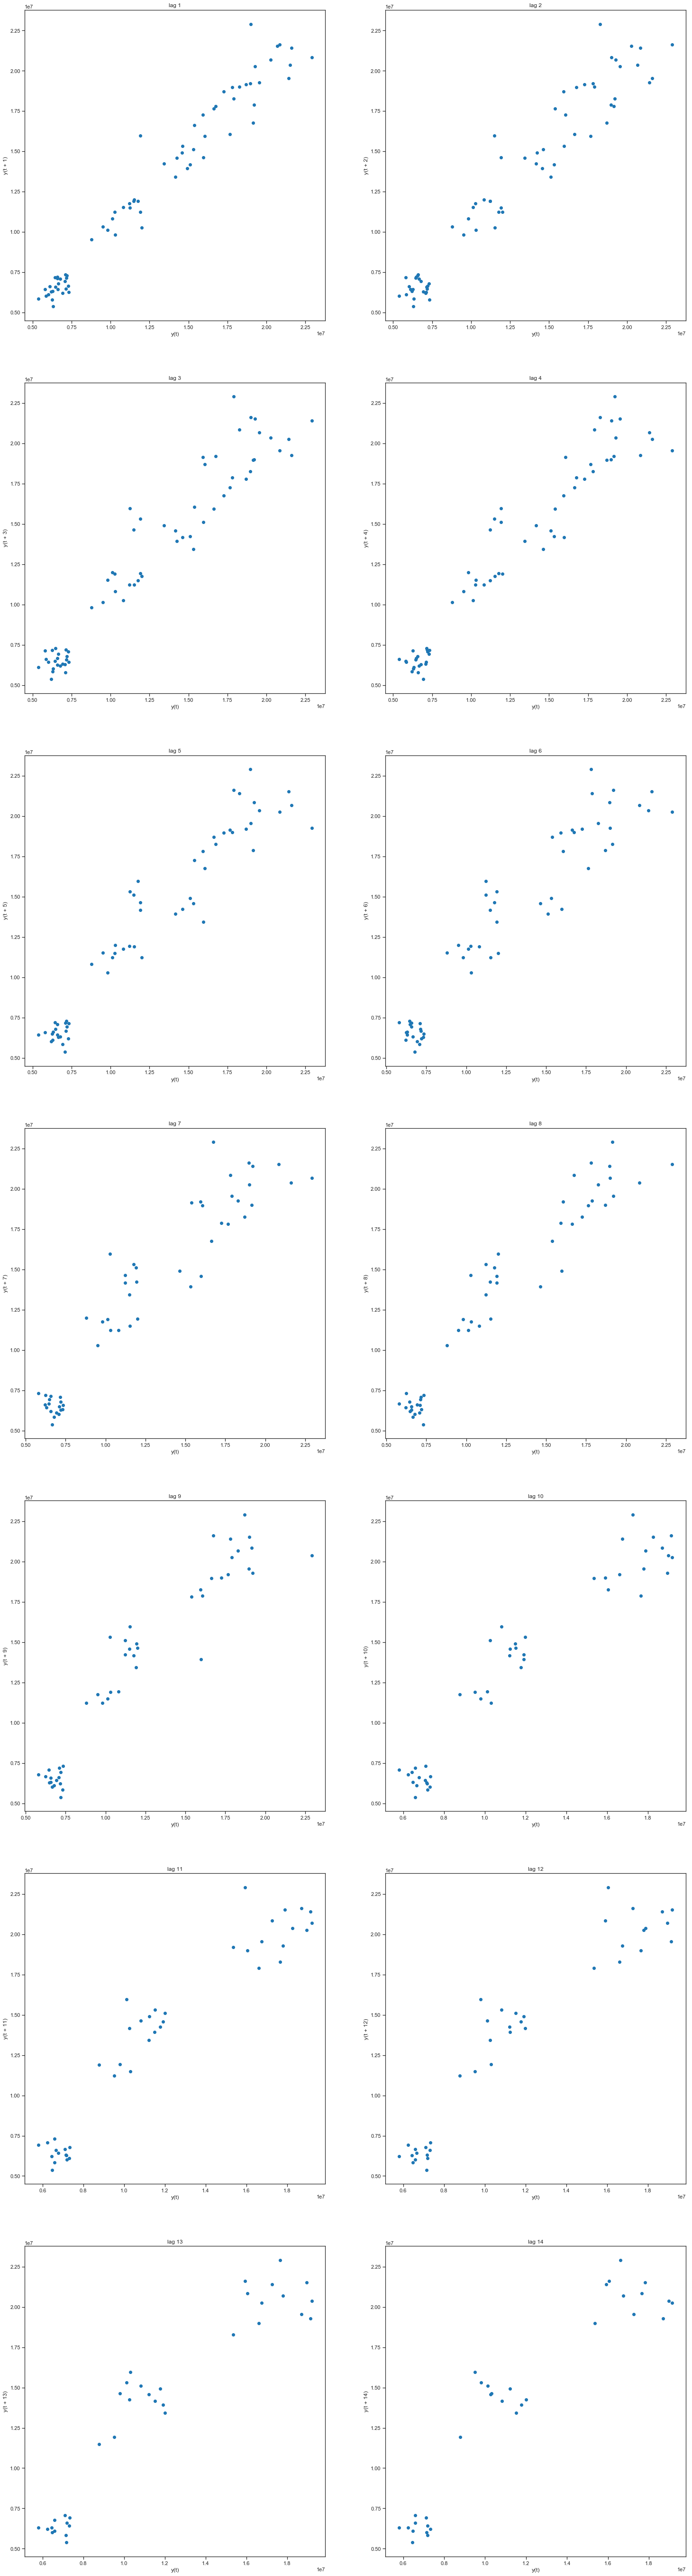

In [16]:
#Buscamos estacionalidad con el lag
plt.rcParams['figure.figsize'] = [25, 200]
for i in range(14):
    plt.subplot(14,2,i+1)
    plt.title("lag " + str(i+1))
    lag_plot(datos.iloc[:,2:],lag=i+1);

###### No encontramos estacionalidad en el lag_plot

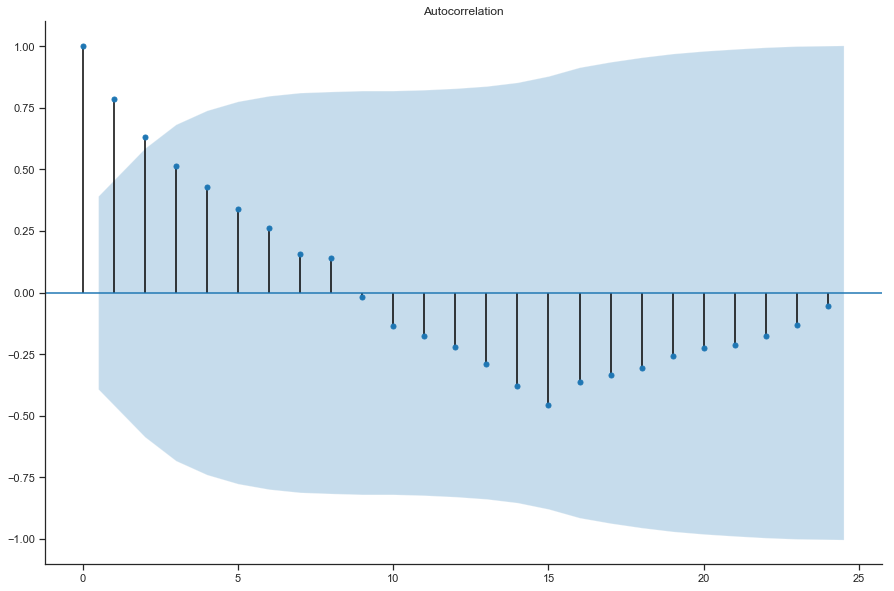

In [17]:
#Graficamos la autocorrelacion 
plt.rcParams['figure.figsize'] = [15, 10]

fig, ax = plt.subplots(); #figsize=(52,35)
sm.graphics.tsa.plot_acf(datos.iloc[:,2:3], lags=24, ax=ax) #Debemos ajustar a la cantidad de lags correspondientes
sns.despine()
plt.show()

'Minutos pospago salientes (miles)'

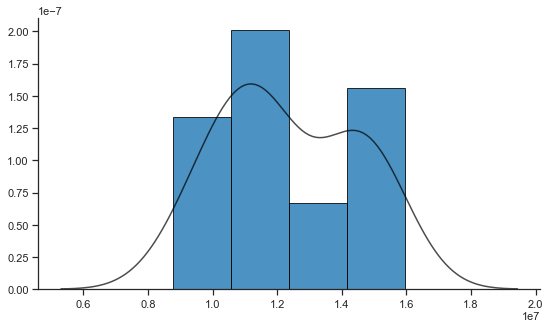

'Minutos prepago salientes (miles)'

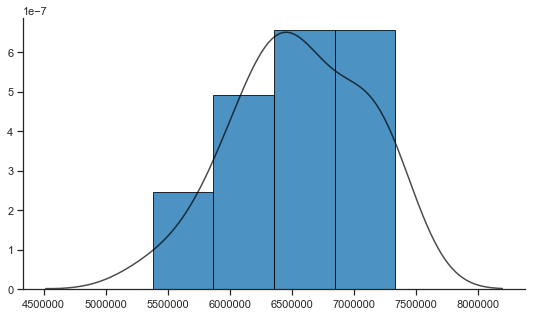

'Total de minutos salientes (miles)'

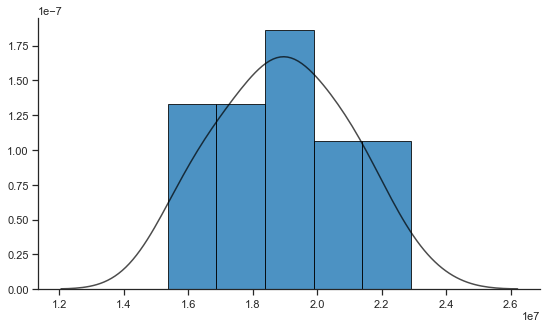

In [18]:
#Graficamos el histograma de las series
def hist(series):
    plt.rcParams['figure.figsize'] = [9, 5]

    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

for i in range(2,5):
    display(datos.columns[i])
    hist(datos.iloc[:,i:i+1])
    plt.show()

In [19]:
#Convertimos el índice a datatime
datos.index = pd.to_datetime(datos.index)
#type(datos.index[-1])

In [20]:
#Convertimos el indice a período, así podemos realizar la separación de test, predict
datos.index = datos.index.to_period(freq='Q') 

In [21]:
type(datos.index[-1])

pandas._libs.tslibs.period.Period

#### Implementando Naive *Random Walk*

In [22]:
#Agregamos fechas que van a ser las cuales vamos a "predecir"
h = 4
pd.period_range(start=datos.iloc[:,2:].index[-1]+1, periods=h, freq='Q')

PeriodIndex(['2019Q2', '2019Q3', '2019Q4', '2020Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [23]:
#Trabajaremos sore la serie de 'Total de minutos salientes'
y = datos['Total de minutos salientes (miles)']

In [24]:
#Agregamos las "predicciones" en "Total de minutos salientes" del último valor. Naive(Random walk)
h = 4
test=pd.period_range(start=datos.iloc[:,2:].index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred,test

(2019Q2    20364355.0
 2019Q3    20364355.0
 2019Q4    20364355.0
 2020Q1    20364355.0
 Freq: Q-DEC, dtype: float64,
 PeriodIndex(['2019Q2', '2019Q3', '2019Q4', '2020Q1'], dtype='period[Q-DEC]', freq='Q-DEC'))

In [25]:
datos['Total de minutos salientes (miles)'].tail(5)

2018Q1    19274565.0
2018Q2    20267591.0
2018Q3    20682782.0
2018Q4    21528745.0
2019Q1    20364355.0
Freq: Q-DEC, Name: Total de minutos salientes (miles), dtype: float64

In [26]:
y.shift(1).tail(5)

2018Q1    19545262.0
2018Q2    19274565.0
2018Q3    20267591.0
2018Q4    20682782.0
2019Q1    21528745.0
Freq: Q-DEC, Name: Total de minutos salientes (miles), dtype: float64

In [27]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

1409600.295

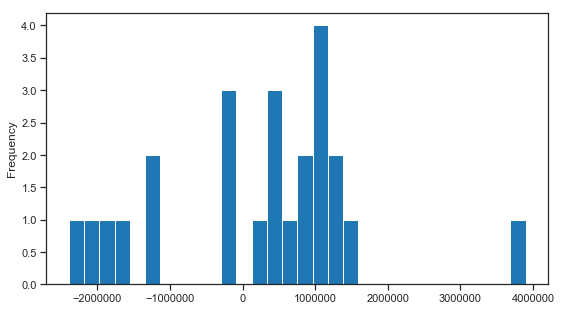

In [28]:
resid.plot.hist(bins=30)

In [29]:
#Prediccion de los intervalos/cotas superior e inferior
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019Q2,1.760159e+07,2.312712e+07
2019Q3,1.645721e+07,2.427150e+07
2019Q4,1.557910e+07,2.514961e+07
2020Q1,1.483882e+07,2.588989e+07


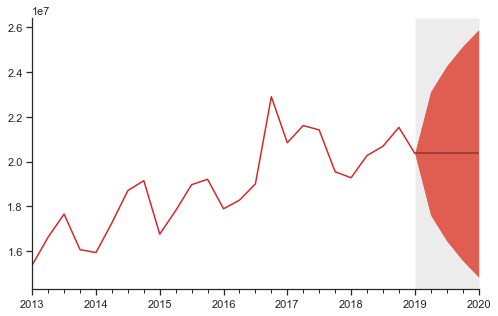

In [30]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['2000':],point_pred,intv,intv,intv)
sns.despine()
plt.show()

##### Implementando Simple *Exponential Smoothing*

In [31]:
#Corremos el modelo
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,43907864549324.172
Optimized:,True,AIC,708.856
Trend:,None,BIC,711.294
Seasonal:,None,AICC,710.856
Seasonal Periods:,None,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,07:21:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6030715,alpha,True
initial_level,1.5372e+07,l.0,True


In [32]:
#Observamos el Error MSE
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))

 In-sample fit:
 MSE               1756314581972.967


In [33]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -387.901
 AIC               781.803
 BIC               785.460


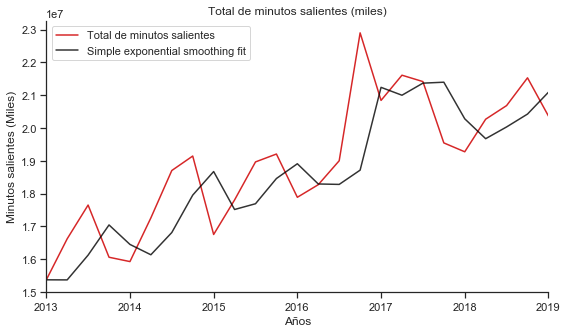

In [34]:
#Comparamos los datos originales con los fiteados por el modelo
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color=red, label='Total de minutos salientes')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('Años')
ax.set_ylabel('Minutos salientes (Miles)')
ax.set_title('Total de minutos salientes (miles)')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

##### Diagnostico de Residuo del Exp. Smooth

In [35]:
resid=y-fitted_ses # model_ses.resid isn't a panda.Series, so no index, no plot

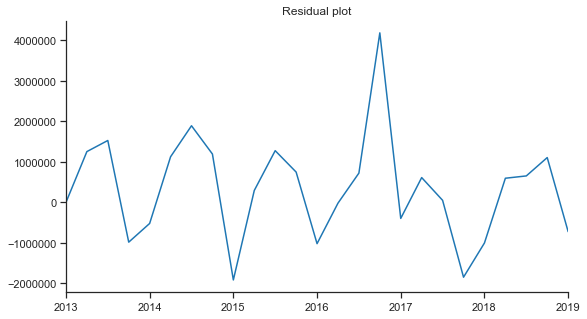

In [36]:
fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

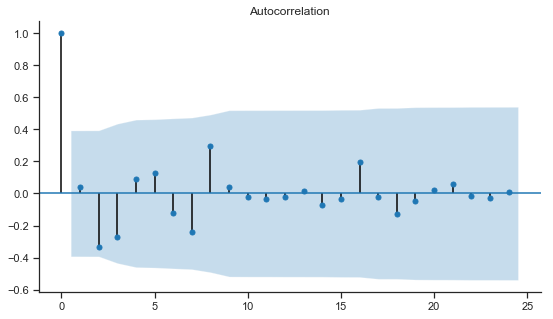

In [37]:
#Grafico de autocorrelacion del residuo
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=24, ax=ax) #Debemos ajustar a la cantidad de lags correspondientes
sns.despine()
plt.show()

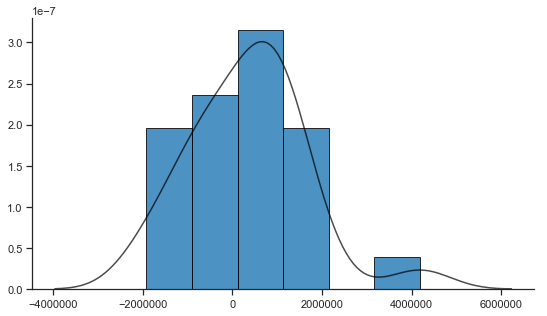

In [38]:
#Graficamos el histograma y densidad del residuo (la fincion 'hist' la hemos definido mas arriba)

hist(resid)
plt.show()

##### Ahora compararemos ambos modelos (Random Walk y Simple.Exp.Smoothing)

In [39]:
y.index.get_loc('2017Q1')/len(y) #64% de datos usados en training

0.64

In [40]:
#Definimos los datos de entrenamiento y los datos de validación. (Validation)
# Real time forecasting - use it as a template - expanding window

validation=y['2017Q1':].index # the validation period is Q1 2017 onwards
start = y.index.get_loc('2017Q1') # numerical index corresponding to Q1 2017

#Hacemos tantos entrenamientos como valores en el set de validacion

#ENTRENO TANTOS MODELOS COMO NÚMEROS DE PREDICCIONES.... ESTO PARA VALIDAR EL MODELO
pred1 = [] #Randon walk
pred2 = [] #Simple Smooth
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value VALOR REAL
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() #Siempre usamos la serie original para hacer las predicciones
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW (Random Walk)', 'SES (Simple.Exp.Smooth)', 'Valores Actuales']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

,RW (Random Walk),SES (Simple.Exp.Smooth),Valores Actuales
2018Q1,19545262.0,2.038565e+07,19274565.0
2018Q2,19274565.0,1.959786e+07,20267591.0
2018Q3,20267591.0,2.003154e+07,20682782.0
2018Q4,20682782.0,2.040362e+07,21528745.0
2019Q1,21528745.0,2.114091e+07,20364355.0


In [41]:
#Observamos que error tiene cada modelo
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW (Random Walk),1138575.635,390031.974
SES (Simple.Exp.Smooth),1162316.651,398242.592


C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


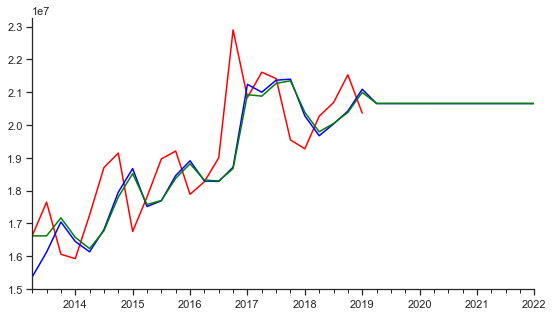

In [42]:
#Graficamos los modelos y los datos
h=12
w=h*2 #Son 24Q (trimestres) o sea 24*3 = 72 meses= 6 años
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit() #Nos quedamos con w valores
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');
sns.despine()